# Lab2:  Linear Classfication and Stochastic Gradient Descent

## Step1: Import and devide dataset.

In [28]:
# load the dataset
from sklearn.datasets import load_svmlight_file

x_train, y_train = load_svmlight_file("a9a", n_features=123)
x_train= x_train.toarray()

x_test,y_test = load_svmlight_file("a9a.t", n_features=123)
x_test=x_test.toarray()

In [29]:
# preprocess the dateset
import numpy

n_samples, n_features = x_train.shape
x_train = numpy.column_stack((x_train, numpy.ones((n_samples, 1))))
x_test = numpy.column_stack((x_test, numpy.ones((x_test.shape[0], 1))))

y_train = y_train.reshape((-1, 1))
y_test=y_test.reshape(y_test.shape[0],1)

#y_train[y_train==-1]=0
#y_test[y_test==-1]=0

## Step2: Initialize SVM model parameters

In [30]:
alpha = 0.01 #learning rate
maxIteration = 300
Threshold=0.5
batch=128
train_loss, test_loss,train_accr,test_accr = [],[],[],[]

# theta = numpy.zeros((n_features + 1, 1))  # initialize with zeros
#theta = numpy.random.random((n_features+1 , 1))  # initialize with random numbers
theta = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution

## Step3: Stochastic gradient function, loss funciton and accuracy function
## Step4: Gradient descent

In [31]:
def MSGD(theta):
    index =  (1 - y_train * (numpy.dot(x_train ,theta)) < 0)
    y = y_train.copy()
    y[index] = 0
    sumG=0
    for i in range(0,batch):
        i=numpy.random.randint(0,n_samples)
        sumG+= (- ((x_train)[i].T * y[i]).reshape(124,1))
    sumG/=batch
    gradient = theta+sumG
    return gradient

#hinge loss
def cal_loss(x,y,theta):
    Eloss = 1 - numpy.dot(y.T,numpy.dot(x,theta))
    Eloss[Eloss<0] = 0
    loss =0.5 * numpy.dot(theta.transpose(), theta).sum() 
    loss+=(Eloss.sum()/n_samples)
    return loss
    
def cal_accur(x,y,theta):
    hypothesis = numpy.dot(x ,theta)
    hypothesis[hypothesis > 0] = 1
    hypothesis[hypothesis <= 0] = -1
    return numpy.count_nonzero(hypothesis == y)/ x.shape[0]

def SGD(theta):
    for i in range(maxIteration):
        gradient = MSGD(theta)
        theta = theta - alpha * gradient 
       # print(theta)
    
        train_loss.append(cal_loss(x_train,y_train,theta))
        test_loss.append(cal_loss(x_test,y_test,theta))
        train_accr.append(cal_accur(x_train,y_train,theta))
        test_accr.append(cal_accur(x_test,y_test,theta))

SGD(theta)
print(train_loss[0])
print(test_loss[0])
    
print(train_loss[len(train_loss)-1])
print(test_loss[len(test_loss)-1])


2.226978591645193
1.748176425573999
0.07779036954019028
0.07779036954019028


The best accuracy for train set is  0.7618623506649058
The best accuracy for evaluation set is  0.7684417419077453


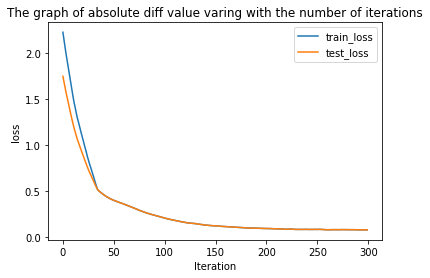

In [32]:
#draw picture
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot( train_loss, label="train_loss")
plt.plot( test_loss,label="test_loss" )
plt.legend(loc="upper right")
plt.title("The graph of absolute diff value varing with the number of iterations")

print("The best accuracy for train set is " ,max(train_accr))
print("The best accuracy for evaluation set is " ,max(test_accr))

## Adam

In [33]:
train_loss_adam,test_loss_adam,train_accr_adam,test_accr_adam = [],[],[],[]
# theta = numpy.zeros((n_features + 1, 1))  # initialize with zeros
#theta = numpy.random.random((n_features+1 , 1))  # initialize with random numbers
theta = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution
import math

def adam(w):
 
    t = 0 
    m = 0  
    v = 0  
    b1 = 0.9  
    b2 = 0.999
    learning_rate=0.001
    for i in range(0, maxIteration):
        
        gradient = MSGD(w)
        t +=1 
        m = b1*m + ((1-b1)*gradient).sum() 
        v = b2*v + ((1-b2)*(gradient**2)).sum()  
        mt = m/(1-(b1**t))  
        vt = v/(1-(b2**t)) 
        w = w- learning_rate * mt/(math.sqrt(vt)+0.000000001) 
        
        train_loss_adam.append(cal_loss(x_test,y_test,w))
        test_loss_adam.append( cal_loss(x_train,y_train,w))
        train_accr_adam.append(cal_accur(x_test,y_test,w))
        test_accr_adam.append(cal_accur(x_train,y_train,w))
        
adam(theta)


In [39]:
print(train_loss_adam[len(train_loss_adam)-1])
print(test_loss_adam[len(test_loss_adam)-1])

0.8365192471761043
0.8365192471761043


The best accuracy for train set is  0.7638351452613475
The best accuracy for evaluation set is  0.7591904425539756


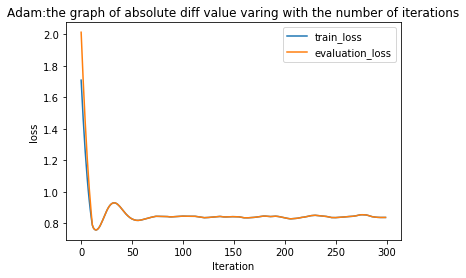

In [37]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_adam, label="train_loss")
plt.plot(test_loss_adam,label="evaluation_loss" )
plt.legend(loc ='upper right')
plt.title("Adam:the graph of absolute diff value varing with the number of iterations")


print("The best accuracy for train set is " ,max(train_accr_adam))
print("The best accuracy for evaluation set is " ,max(test_accr_adam))

# Graph of two different stochastic gradient descent methods

Text(0.5,1,'The comparison of Batch Stochastic Gradient Descent and Adam')

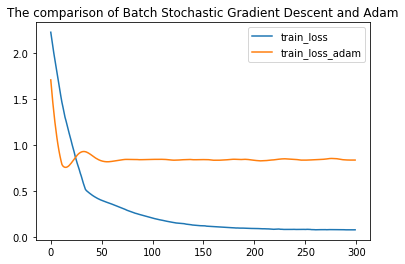

In [40]:
plt.plot(train_loss, label="train_loss")
plt.plot(train_loss_adam, label="train_loss_adam")
plt.legend(loc="upper right")
plt.title("The comparison of Batch Stochastic Gradient Descent and Adam")
